# 互评作业1: 数据探索性分析与数据预处理
**姓名**：聂宇翔  
**学号**：1120161722  
**Github地址**：https://github.com/JerrryNie/dataMining

# 内容  
## 1. 数据集：Wine Reviews
### 1.1. 数据可视化和摘要
- **数据摘要**
    - 数据信息概览
    - 标称属性，给出每个可能聚会的频数

    - 数值属性，给出5数概括及缺失值的个数

- **数据可视化**
    - 使用直方图、盒图等检查数据分布及离群点

### 1.2 数据缺失的处理
- **将缺失部分剔除**
- **用最高频率值来填补缺失值**
- **通过属性的相关关系来填补缺失值**
- **通过数据对象之间的相似性来填补缺失值**

## 2. 数据集：MLB Pitch Data 2015-2018
### 2.1. 数据可视化和摘要
- **数据摘要**
    - 标称属性，给出每个可能聚会的频数

    - 数值属性，给出5数概括及缺失值的个数

- **数据可视化**
    - 使用直方图、盒图等检查数据分布及离群点

### 212.2 数据缺失的处理
- **将缺失部分剔除**
- **用最高频率值来填补缺失值**
- **通过属性的相关关系来填补缺失值**
- **通过数据对象之间的相似性来填补缺失值**

## 1. 数据集：Wine Reviews

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
wineReviewDataSet = pd.read_csv('winemag-data_first150k.csv')

### 1.1. 数据可视化和摘要

#### 1.1.1. 数据信息概览  
在进行数据分析之前，对数据信息进行概览是十分有必要的。

In [3]:
print(wineReviewDataSet.dtypes.value_counts())

object     8
int64      2
float64    1
dtype: int64


所以说，该数据中具有的标称属性为8个，而数值属性为3个。

然后我们对该数据集进行概要上的了解：

In [4]:
wineReviewDataSet.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


所以说，该数据中具有的标称属性有7个（country, designation, province, region_1, region_2, variety, winery），
而数值属性为2个（points, price）。

#### 1.1.2. 数据摘要

**标称属性摘要**
我们将以上图所得的7个标称属性为目的，进行频数统计。为此我们首先定义一个函数colCntPlot用于对数据集中特定的列进行频数统计并利用直方图对前10个频率最高的值进行可视化。

In [5]:
def colCntPlot(data, colName, top=10):
    col = data[colName].value_counts()
    itemNum = len(col)
    print('The colunm name is:', colName)
    print('There are {} different values.\n'.format(itemNum))
    print('There are {} values in total.\n'.format(len(data.index)))
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(data.index))
    col_df.rename(columns={colName: 'valueCounts'}, inplace=True)
    print('The most {} frequent values are:'.format(top))
    print(col_df.iloc[:top])
    plt.bar(np.arange(top), col.iloc[:top])
    plt.title(colName)
    plt.show()
    

The colunm name is: country
There are 48 different values.

There are 150930 values in total.

The most 10 frequent values are:
             valueCounts  frequency
US                 62397   0.413417
Italy              23478   0.155556
France             21098   0.139787
Spain               8268   0.054780
Chile               5816   0.038534
Argentina           5631   0.037309
Portugal            5322   0.035261
Australia           4957   0.032843
New Zealand         3320   0.021997
Austria             3057   0.020254


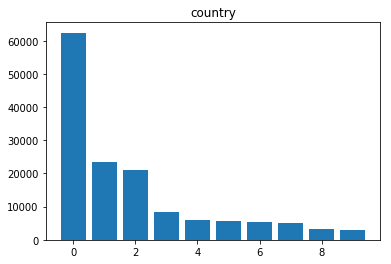

In [6]:
attributeName = 'country'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: designation
There are 30621 different values.

There are 150930 values in total.

The most 10 frequent values are:
                valueCounts  frequency
Reserve                2752   0.018234
Reserva                1810   0.011992
Estate                 1571   0.010409
Barrel sample          1326   0.008786
Riserva                 754   0.004996
Barrel Sample           639   0.004234
Brut                    624   0.004134
Crianza                 503   0.003333
Estate Grown            449   0.002975
Estate Bottled          396   0.002624


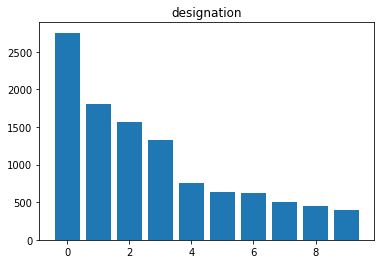

In [7]:
attributeName = 'designation'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: province
There are 455 different values.

There are 150930 values in total.

The most 10 frequent values are:
                  valueCounts  frequency
California              44508   0.294892
Washington               9750   0.064599
Tuscany                  7281   0.048241
Bordeaux                 6111   0.040489
Northern Spain           4892   0.032412
Mendoza Province         4742   0.031419
Oregon                   4589   0.030405
Burgundy                 4308   0.028543
Piedmont                 4093   0.027119
Veneto                   3962   0.026251


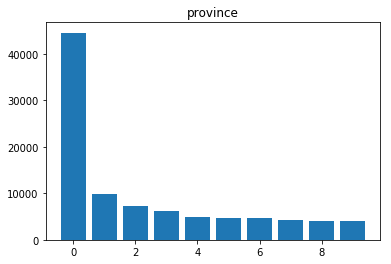

In [8]:
attributeName = 'province'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: region_1
There are 1236 different values.

There are 150930 values in total.

The most 10 frequent values are:
                      valueCounts  frequency
Napa Valley                  6209   0.041138
Columbia Valley (WA)         4975   0.032962
Mendoza                      3586   0.023759
Russian River Valley         3571   0.023660
California                   3462   0.022938
Paso Robles                  3053   0.020228
Willamette Valley            2096   0.013887
Rioja                        1893   0.012542
Toscana                      1885   0.012489
Sonoma County                1853   0.012277


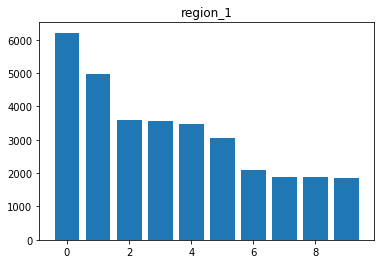

In [9]:
attributeName = 'region_1'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: region_2
There are 18 different values.

There are 150930 values in total.

The most 10 frequent values are:
                         valueCounts  frequency
Central Coast                  13057   0.086510
Sonoma                         11258   0.074591
Columbia Valley                 9157   0.060671
Napa                            8801   0.058312
California Other                3516   0.023296
Willamette Valley               3181   0.021076
Mendocino/Lake Counties         2389   0.015829
Sierra Foothills                1660   0.010998
Napa-Sonoma                     1645   0.010899
Finger Lakes                    1510   0.010005


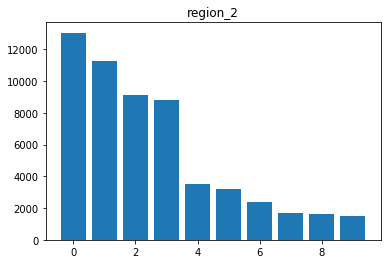

In [10]:
attributeName = 'region_2'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: variety
There are 632 different values.

There are 150930 values in total.

The most 10 frequent values are:
                          valueCounts  frequency
Chardonnay                      14482   0.095952
Pinot Noir                      14291   0.094686
Cabernet Sauvignon              12800   0.084808
Red Blend                       10062   0.066667
Bordeaux-style Red Blend         7347   0.048678
Sauvignon Blanc                  6320   0.041874
Syrah                            5825   0.038594
Riesling                         5524   0.036600
Merlot                           5070   0.033592
Zinfandel                        3799   0.025171


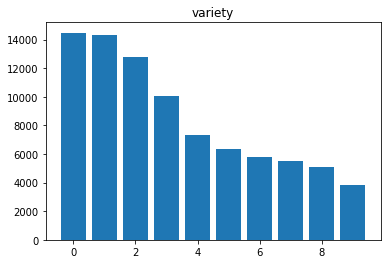

In [11]:
attributeName = 'variety'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

The colunm name is: winery
There are 14810 different values.

There are 150930 values in total.

The most 10 frequent values are:
                       valueCounts  frequency
Williams Selyem                374   0.002478
Testarossa                     274   0.001815
DFJ Vinhos                     258   0.001709
Chateau Ste. Michelle          225   0.001491
Columbia Crest                 217   0.001438
Concha y Toro                  216   0.001431
Kendall-Jackson                216   0.001431
Trapiche                       205   0.001358
Bouchard Père & Fils           203   0.001345
Kenwood                        191   0.001265


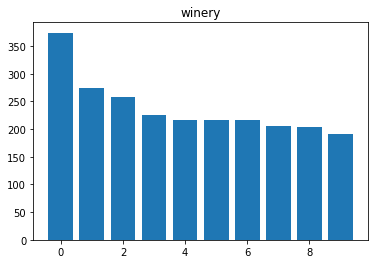

In [12]:
attributeName = 'winery'
topFrequency = 10
colCntPlot(wineReviewDataSet, attributeName, topFrequency)

**数值属性摘要**  
该部分包括“数值数据摘要（五数概括）”以及“缺失值统计”

数值数据摘要（五数概括）如下所示：

In [13]:
wineReviewDataSet.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


其中需要注意的是，“Unnamed: 0”实际上是数据的id，因此不予考虑

缺失值统计信息如下列信息所示：

In [14]:
wineReviewDataSet.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

其中，“points”和“price”所对应的行即为数值数据的缺失值信息。

#### 1.1.3. 数据可视化  
该部分主要通过数据的“直方图”“盒图”来进行数据的可视化，并通过这两类图进行离群点分析。

**直方图**  
由于关于标称属性的直方图在前面内容中已经体现出来了，所以此处将对数值属性（points）和（price）进行直方图绘制。

In [15]:
def plotHist(data, colName, divisionNum=20):
    col = data[colName].dropna()
    plt.hist(col, divisionNum)
    plt.title(colName)
    plt.show()

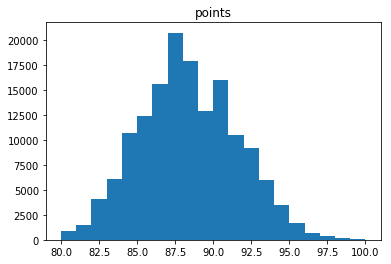

In [16]:
attributeName = 'points'
plotHist(wineReviewDataSet, attributeName)

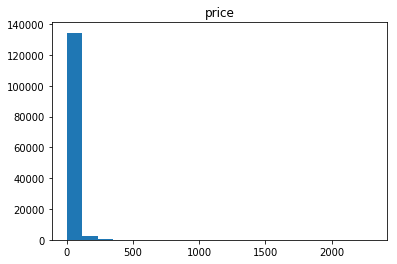

In [17]:
attributeName = 'price'
plotHist(wineReviewDataSet, attributeName)

**盒图**

首先我们定义函数“boxPlot”用以对特定数据集下特定列的盒图进行绘制

In [18]:
def boxPlot(data, colName):
    fig, ax = plt.subplots()
    ax.set_title(colName)
    ax.boxplot(data[colName].dropna())
    plt.show()

绘制“points”的属性：

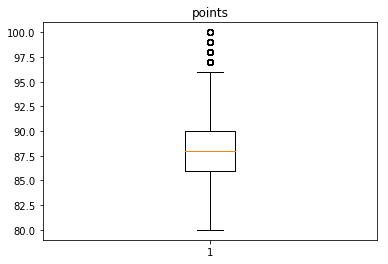

In [19]:
attributeName = 'points'
boxPlot(wineReviewDataSet, attributeName)

由上图可以看出，关于“points”属性的离群点主要分布在数值较高的位置。

绘制“price”的属性：

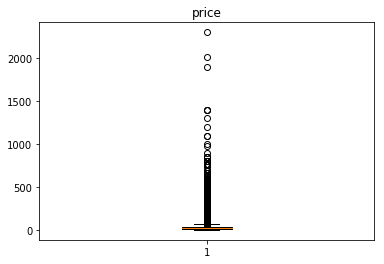

In [20]:
attributeName = 'price'
boxPlot(wineReviewDataSet, attributeName)

由上图可以看出，关于“price”属性的离群点相对于数据集中区域的偏离程度较大。

### 1.2. 数据缺失的处理

首先需要导入winemag-data-130k-v2.csv文件，作为数据处理后的对比项。

In [21]:
wineReviewDataSet130k = pd.read_csv('winemag-data-130k-v2.csv')

### 1.2.1 将缺失部分剔除

首先我们需要查看一下原数据中缺失数据的数据量

我们定义函数"plotOldNewStandard"和"plotOldNewStandardNominal"分别用于数值属性和标称属性，对处理前的数据、处理后的数据以及130k这个版本的数据进行对比：

In [22]:
def plotOldNewStandard(colOld, colNew, colStandard, colName, showOld=True, divisionNum=20):
    
    colOld = colOld.dropna()
    colNew = colNew.dropna()
    colStandard = colStandard.dropna()
    if showOld:
        plt.figure(13)
        plt.subplot(131)
        plt.hist(colOld, divisionNum)
        plt.title(colName + ' Old')

        plt.subplot(132)
        plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')

        plt.subplot(133)
        plt.hist(colNew, divisionNum)
        plt.title(colName + ' 130k')

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(12)
        plt.subplot(121)
        plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')
        
        plt.subplot(122)
        colStandard = colStandard.dropna()
        plt.hist(colStandard, divisionNum)
        plt.title(colName + ' 130k')
        
        plt.tight_layout()
        plt.show()

def plotOldNewStandardNominal(colOld, colNew, colStandard, colName, showOld=True, top=10, divisionNum=20):
    
    colOld = colOld.value_counts()
    colNew = colNew.value_counts()
    colStandard = colStandard.value_counts()
    
    if showOld:
        plt.figure(13)
        
        plt.subplot(131)
        plt.bar(np.arange(top), colOld.iloc[:top])
        plt.title(colName + ' Old')
        
        plt.subplot(132)
        plt.bar(np.arange(top), colNew.iloc[:top])#plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')

        plt.subplot(133)
        plt.bar(np.arange(top), colStandard.iloc[:top])#plt.hist(colNew, divisionNum)
        plt.title(colName + ' 130k')

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(12)
        plt.subplot(121)
        plt.bar(np.arange(top), colNew.iloc[:top])#plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')
        
        plt.subplot(122)
        colStandard = colStandard.dropna()
        plt.bar(np.arange(top), colStandard.iloc[:top])#plt.hist(colStandard, divisionNum)
        plt.title(colName + ' 130k')
        
        plt.tight_layout()
        plt.show()


对于属性“points”：

In [23]:
attributeName = 'points'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


由于该属性不存在缺失数据，因此无须处理（之后的数据缺失处理中，也将不再考虑该数据）。

对于属性“price”：

In [24]:
attributeName = 'price'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 13695


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

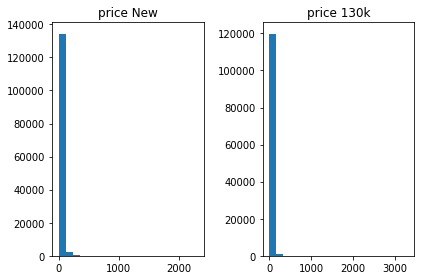

In [25]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandard(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“country”：

In [26]:
attributeName = 'country'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 5


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

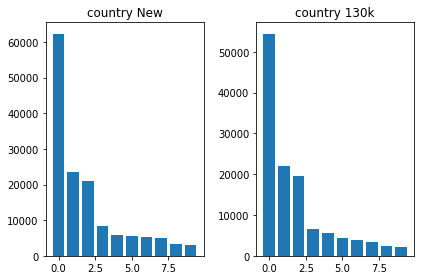

In [27]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“designation”：

In [28]:
attributeName = 'designation'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 45735


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

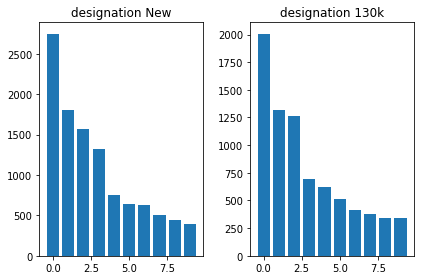

In [29]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“province”：

In [30]:
attributeName = 'province'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 5


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

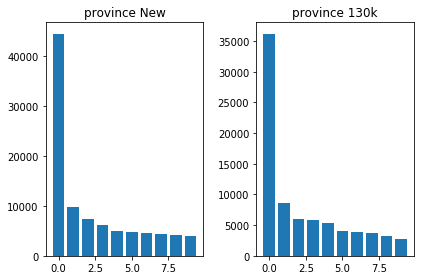

In [31]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“region_1”：

In [32]:
attributeName = 'region_1'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 25060


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

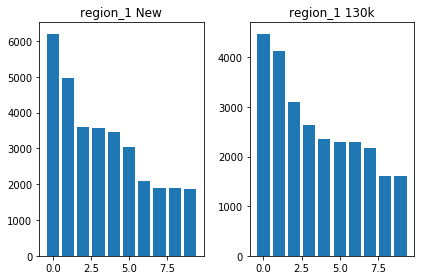

In [33]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“region_2”：

In [34]:
attributeName = 'region_2'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 89977


剔除该属性中的缺失值并与旧数据和130k版本进行对比分析：

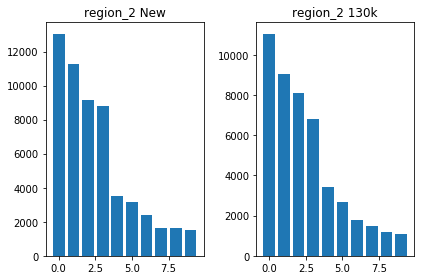

In [35]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.dropna()
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=False)

对于属性“variety”：

In [36]:
attributeName = 'variety'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


由于该属性不存在缺失数据，因此无须处理（之后的数据缺失处理中，也将不再考虑该数据）。

对于属性“winery”：

In [37]:
attributeName = 'winery'
col = wineReviewDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


由于该属性不存在缺失数据，因此无须处理（之后的数据缺失处理中，也将不再考虑该数据）。

### 1.2.2 用最高频率值来填补缺失值

对于属性“price”，处理方法如下：

In [38]:
attributeName = 'price'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

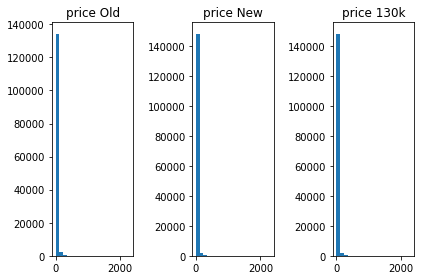

In [39]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandard(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

对于属性“country”，处理方法如下：

In [40]:
attributeName = 'country'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

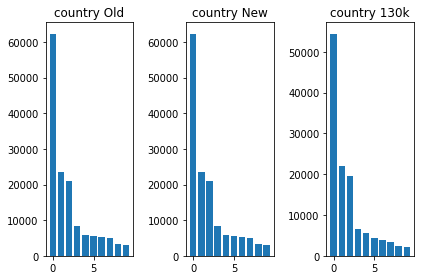

In [41]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

对于属性“designation”，处理方法如下：

In [42]:
attributeName = 'designation'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

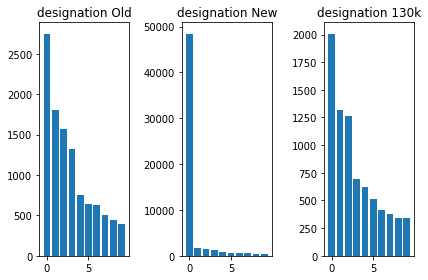

In [43]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

对于属性“province”，处理方法如下：

In [44]:
attributeName = 'province'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

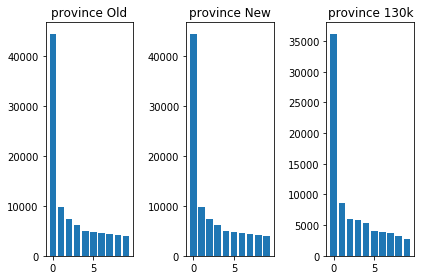

In [45]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

对于属性“region_1”，处理方法如下：

In [46]:
attributeName = 'region_1'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

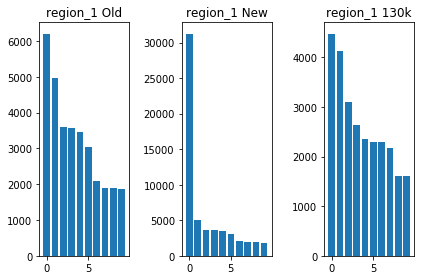

In [47]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

对于属性“region_2”，处理方法如下：

In [48]:
attributeName = 'region_2'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

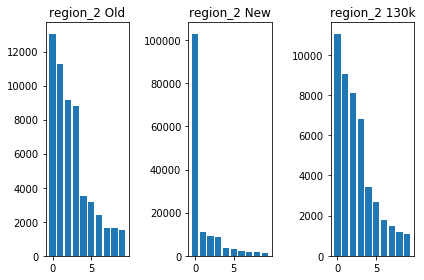

In [49]:
colOld = wineReviewDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
colStandard = wineReviewDataSet130k[attributeName]
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

由以上所有的对比图，可以得到的结论是，属性“price”“country”“province”适合利用最高频率值来填补缺失值；
而属性“designation”“region_1”“region_2”较不适合这类方法。

### 1.2.3 通过属性的相关关系来填补缺失值
由于利用相关关系的前提在于，属性之间需要能够比较大小，因此“标称属性”不适用于这类方法，因此我们在此处仅需要利用相关关系对具有缺失值的数值型属性"price"进行缺失值填补（"points"不具有缺失值，所以在此略去）。

对于属性“price”，处理方法如下：

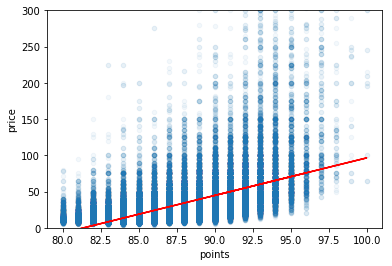

In [50]:
new_df = wineReviewDataSet.dropna(subset=['price'])
new_df.plot(kind="scatter", x="points", y="price", alpha=0.05)
x = new_df['points']
y = new_df['price']

from sklearn.linear_model import LinearRegression

X = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

plt.plot(X, model.predict(X), 'r-')
plt.ylim(0,300)
plt.show()


由上图可知，属性points和price之间具有线性相关性,因此我们建立线性回归模型，通过points来预测price的值, 并将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

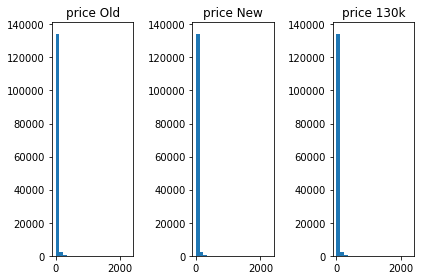

In [51]:
wineReviewDataSetNew = wineReviewDataSet.copy()
for index, row in wineReviewDataSetNew[wineReviewDataSet['price'].isna()].iterrows():
    row['price'] = model.predict(np.array(row['points']).reshape(-1, 1))
    
attributeName = 'price'
colOld = wineReviewDataSet[attributeName]
colNew = wineReviewDataSet[attributeName]
colStandard = wineReviewDataSet[attributeName]

plotOldNewStandard(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

### 1.2.4 通过数据对象之间的相似性来填补缺失值
由于标称属性之间很难进行相似性的度量，因此本处将利用points属性的相近程度，从而进行price属性的缺失值填充：

In [52]:
simFill = wineReviewDataSet.copy()
point2price = {}
for row in simFill.iterrows():
    if point2price.get(row[1]['points'], None):
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']][0] += row[1]['price']
            point2price[row[1]['points']][1] += 1
    else:
        if not pd.isnull(row[1]['price']):
            point2price[row[1]['points']] = [row[1]['price'], 1]
    
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)
    
for row in simFill.iterrows():
    if pd.isnull(row[1]['price']):
        row[1]['price'] = point2price[row[1]['points']][0]
        


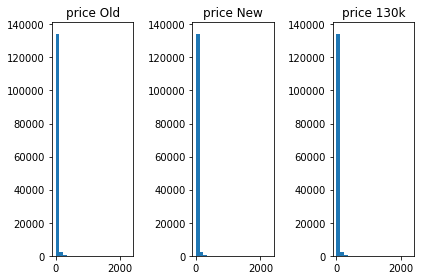

In [53]:
colOld = wineReviewDataSet['price']
colNew = simFill['price']
colStandard = wineReviewDataSet130k['price']
plotOldNewStandard(colOld=colOld, colNew=colNew, colStandard=colStandard, colName=attributeName, showOld=True)

## 2. 数据集：MLB Pitch Data 2015-2018

In [54]:
del wineReviewDataSet
del wineReviewDataSet130k
del simFill
del new_df

因为这个数据集中涉及到5个子数据集，因此我们将同时对这几个数据集进行处理。

In [55]:
player_namesDataSet = pd.read_csv('player_names.csv')

In [56]:
pitchesDataSet = pd.read_csv('pitches.csv')

In [57]:
gamesDataSet = pd.read_csv('games.csv')

In [58]:
ejectionsDataSet = pd.read_csv('ejections.csv')

In [59]:
atbatsDataSet = pd.read_csv('atbats.csv')

### 2.1. 数据可视化和摘要

#### 2.1.1. 数据信息概览  
在进行数据分析之前，对数据信息进行概览是十分有必要的。

In [60]:
print('player_names:')
print(player_namesDataSet.dtypes.value_counts(), '\n')
print('pitches:')
print(pitchesDataSet.dtypes.value_counts(), '\n')
print('games:')
print(gamesDataSet.dtypes.value_counts(), '\n')
print('ejections:')
print(ejectionsDataSet.dtypes.value_counts(), '\n')
print('atbats:')
print(atbatsDataSet.dtypes.value_counts(), '\n')


player_names:
object    2
int64     1
dtype: int64 

pitches:
float64    36
object      3
int64       1
dtype: int64 

games:
object    11
int64      6
dtype: int64 

ejections:
object    5
int64     4
bool      1
dtype: int64 

atbats:
int64     7
object    3
bool      1
dtype: int64 



所以说，该数据中:  
player_names: 标称属性为2个，而数值属性为1个。  
pitches: 标称属性为3个，而数值属性为37个。  
games: 标称属性为11个，而数值属性为6个。  
ejections: 标称属性为4个，而数值属性为6个。  
atbats: 标称属性为3个，而数值属性为8个。

然后我们对该数据集进行概要上的了解：

In [61]:
print('player_names:')
player_namesDataSet.head()

player_names:


,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


In [62]:
print('\npitches:')
pitchesDataSet.head()


pitches:


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [63]:
print('\ngames:')
gamesDataSet.head()


games:


,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [64]:
print('\nejections:')
ejectionsDataSet.head()


ejections:


,ab_id,des,event_num,g_id,player_id,date,BS,CORRECT,team,is_home_team
0,2015003219,San Diego Padres center fielder Will Venable e...,732,201500044,461416,4/9/15,NaN,NaN,sdn,True
1,2015003219,San Diego Padres Manager Bud Black ejected by ...,734,201500044,111034,4/9/15,NaN,NaN,sdn,True
2,2015004134,Milwaukee Brewers second baseman Scooter Genne...,584,201500055,571697,4/10/15,Y,C,mil,True
3,2015006692,Cincinnati Reds Manager Bryan Price ejected by...,557,201500088,427406,4/12/15,NaN,NaN,cin,True
4,2015008446,Pittsburgh Pirates Manager Clint Hurdle ejecte...,402,201500111,116346,4/14/15,Y,I,pit,True


In [65]:
print('\natbats:')
atbatsDataSet.head()


atbats:


,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


#### 1.1.2. 数据摘要

**标称属性摘要**
我们将以上图所得的各个数据集的标称属性为基础，进行频数统计。为此我们首先定义一个函数colCntPlot用于对数据集中特定的列进行频数统计并利用直方图对前10个频率最高的值进行可视化。

In [66]:
def colCntPlot(data, colName, top=10):
    col = data[colName].value_counts()
    itemNum = len(col)
    print('The colunm name is:', colName)
    print('There are {} different values.\n'.format(itemNum))
    print('There are {} values in total.\n'.format(len(data.index)))
    col_df = col.to_frame()
    col_df['frequency'] = col.apply(lambda x: x / len(data.index))
    col_df.rename(columns={colName: 'valueCounts'}, inplace=True)
    print('The most {} frequent values are:'.format(top))
    print(col_df.iloc[:top])
    plt.bar(np.arange(top), col.iloc[:top])
    plt.title(colName)
    plt.show()
    

对于**player_names.csv**数据集中的“first_name”“last_name”：

The colunm name is: first_name
There are 788 different values.

There are 2218 values in total.

The most 10 frequent values are:
         valueCounts  frequency
Matt              47   0.021190
Chris             40   0.018034
Ryan              40   0.018034
Tyler             35   0.015780
Mike              29   0.013075
Jose              29   0.013075
David             28   0.012624
Kyle              27   0.012173
Michael           26   0.011722
Nick              24   0.010821


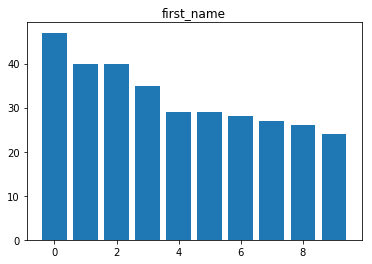

In [67]:
attributeName = 'first_name'
topFrequency = 10
colCntPlot(player_namesDataSet, attributeName, topFrequency)

The colunm name is: last_name
There are 1655 different values.

There are 2218 values in total.

The most 10 frequent values are:
           valueCounts  frequency
Smith               19   0.008566
Garcia              13   0.005861
Perez               12   0.005410
Rodriguez           12   0.005410
Johnson             12   0.005410
Ramirez             11   0.004959
Hernandez           11   0.004959
Anderson            10   0.004509
Gonzalez            10   0.004509
Davis               10   0.004509


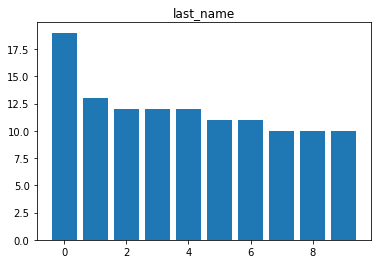

In [68]:
attributeName = 'last_name'
topFrequency = 10
colCntPlot(player_namesDataSet, attributeName, topFrequency)

对于**games.csv**中的标称属性“away_team”“home_team”“umpire_1B”“umpire_2B”“umpire_3B”“umpire_HP”“venue_name”

The colunm name is: away_team
There are 30 different values.

There are 9718 values in total.

The most 10 frequent values are:
     valueCounts  frequency
col          325   0.033443
mil          325   0.033443
nya          324   0.033340
ari          324   0.033340
phi          324   0.033340
sdn          324   0.033340
lan          324   0.033340
sea          324   0.033340
oak          324   0.033340
nyn          324   0.033340


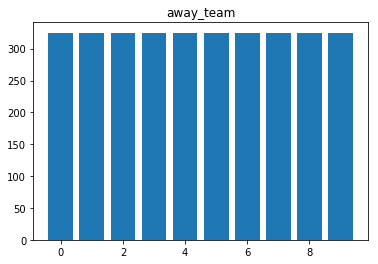

In [69]:
attributeName = 'away_team'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: home_team
There are 30 different values.

There are 9718 values in total.

The most 10 frequent values are:
     valueCounts  frequency
lan          325   0.033443
chn          325   0.033443
nya          324   0.033340
ari          324   0.033340
phi          324   0.033340
sdn          324   0.033340
col          324   0.033340
sea          324   0.033340
oak          324   0.033340
nyn          324   0.033340


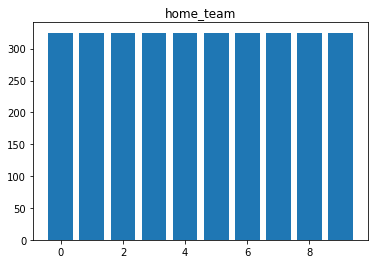

In [70]:
attributeName = 'home_team'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: umpire_1B
There are 101 different values.

There are 9718 values in total.

The most 10 frequent values are:
              valueCounts  frequency
Gabe Morales          133   0.013686
Adam Hamari           126   0.012966
Mark Wegner           125   0.012863
Ryan Blakney          125   0.012863
John Tumpane          124   0.012760
Jim Reynolds          124   0.012760
Cory Blaser           123   0.012657
Jordan Baker          122   0.012554
Pat Hoberg            121   0.012451
Jeff Nelson           121   0.012451


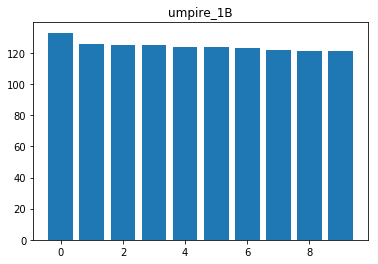

In [71]:
attributeName = 'umpire_1B'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: umpire_2B
There are 101 different values.

There are 9718 values in total.

The most 10 frequent values are:
                 valueCounts  frequency
Laz Diaz                 132   0.013583
Adam Hamari              127   0.013069
Jerry Meals              127   0.013069
John Tumpane             125   0.012863
Gabe Morales             125   0.012863
Joe West                 125   0.012863
Mark Ripperger           125   0.012863
Lance Barksdale          124   0.012760
Ryan Blakney             123   0.012657
Chris Guccione           122   0.012554


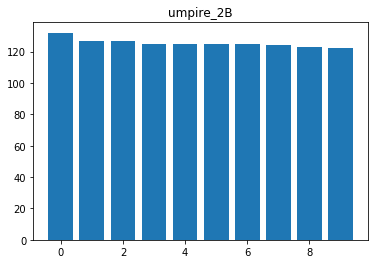

In [72]:
attributeName = 'umpire_2B'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: umpire_3B
There are 103 different values.

There are 9718 values in total.

The most 10 frequent values are:
               valueCounts  frequency
Adam Hamari            133   0.013686
John Tumpane           131   0.013480
Joe West               131   0.013480
Gabe Morales           128   0.013171
Jerry Meals            127   0.013069
Laz Diaz               127   0.013069
Chris Conroy           126   0.012966
Jordan Baker           126   0.012966
Lance Barrett          126   0.012966
Bill Welke             124   0.012760


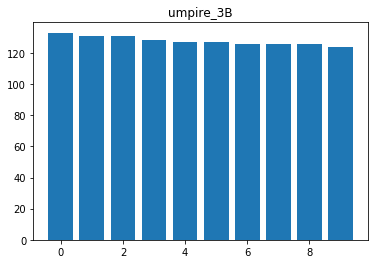

In [73]:
attributeName = 'umpire_3B'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: umpire_HP
There are 101 different values.

There are 9718 values in total.

The most 10 frequent values are:
              valueCounts  frequency
Joe West              133   0.013686
Adam Hamari           127   0.013069
Bill Miller           126   0.012966
Jerry Meals           126   0.012966
Gabe Morales          124   0.012760
Jordan Baker          123   0.012657
Jeff Nelson           122   0.012554
Mark Wegner           122   0.012554
John Tumpane          122   0.012554
Tim Timmons           121   0.012451


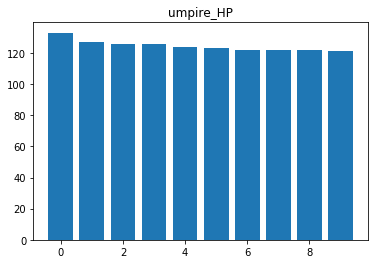

In [74]:
attributeName = 'umpire_HP'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

The colunm name is: venue_name
There are 39 different values.

There are 9718 values in total.

The most 10 frequent values are:
                 valueCounts  frequency
Citi Field               327   0.033649
Tropicana Field          327   0.033649
Miller Park              327   0.033649
Wrigley Field            325   0.033443
Dodger Stadium           325   0.033443
Fenway Park              324   0.033340
Rogers Centre            324   0.033340
Coors Field              324   0.033340
Busch Stadium            324   0.033340
Chase Field              324   0.033340


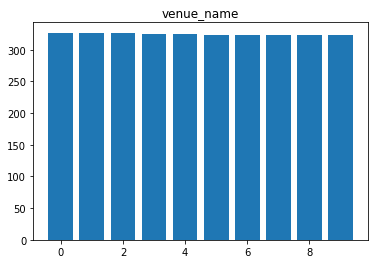

In [75]:
attributeName = 'venue_name'
topFrequency = 10
colCntPlot(gamesDataSet, attributeName, topFrequency)

所以说，该数据中具有的标称属性有7个（country, designation, province, region_1, region_2, variety, winery），
而数值属性为2个（points, price）。

对于**ejections.csv**中的标称属性“BS”“CORRECT”“team”

The colunm name is: BS
There are 1 different values.

There are 761 values in total.

The most 10 frequent values are:
   valueCounts  frequency
Y          395   0.519054


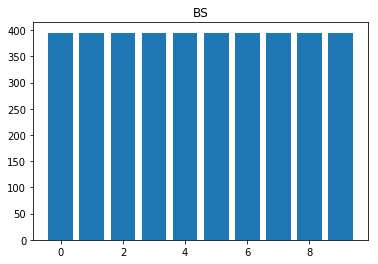

In [76]:
attributeName = 'BS'
topFrequency = 10
colCntPlot(ejectionsDataSet, attributeName, topFrequency)

The colunm name is: CORRECT
There are 3 different values.

There are 761 values in total.

The most 3 frequent values are:
    valueCounts  frequency
C           236   0.310118
I           150   0.197109
IC            9   0.011827


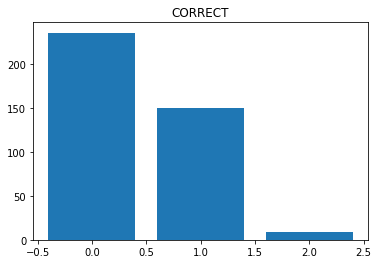

In [77]:
attributeName = 'CORRECT'
topFrequency = 3
colCntPlot(ejectionsDataSet, attributeName, topFrequency)

The colunm name is: team
There are 30 different values.

There are 761 values in total.

The most 10 frequent values are:
     valueCounts  frequency
tor           49   0.064389
cha           36   0.047306
det           36   0.047306
nya           34   0.044678
pit           33   0.043364
kca           32   0.042050
sdn           31   0.040736
was           28   0.036794
chn           28   0.036794
lan           28   0.036794


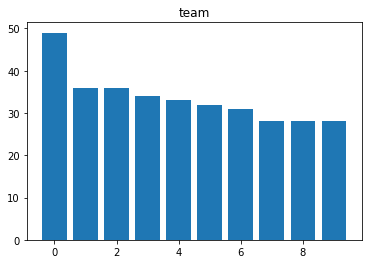

In [78]:
attributeName = 'team'
topFrequency = 10
colCntPlot(ejectionsDataSet, attributeName, topFrequency)

对于atbats.csv中的标称属性“event”“stand”

The colunm name is: event
There are 30 different values.

There are 740389 values in total.

The most 10 frequent values are:
           valueCounts  frequency
Strikeout       157128   0.212224
Groundout       134893   0.182192
Single          108794   0.146942
Flyout           80731   0.109039
Walk             56894   0.076843
Lineout          44934   0.060690
Pop Out          34455   0.046536
Double           33157   0.044783
Home Run         22209   0.029996
Forceout         15112   0.020411


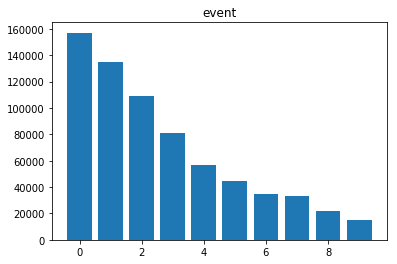

In [79]:
attributeName = 'event'
topFrequency = 10
colCntPlot(atbatsDataSet, attributeName, topFrequency)

The colunm name is: stand
There are 2 different values.

There are 740389 values in total.

The most 2 frequent values are:
   valueCounts  frequency
R       433070   0.584922
L       307319   0.415078


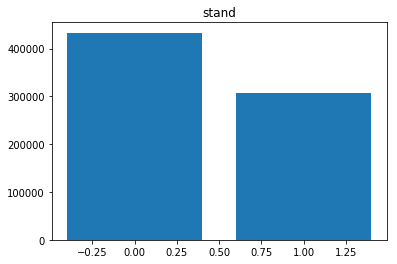

In [80]:
attributeName = 'stand'
topFrequency = 2
colCntPlot(atbatsDataSet, attributeName, topFrequency)

**数值属性摘要**  
该部分包括“数值数据摘要（五数概括）”以及“缺失值统计”

数值数据摘要（五数概括）如下所示：

In [81]:
print('player_names')
player_namesDataSet.describe()

player_names


,id
count,2218.000000
mean,542649.222272
std,81408.817596
min,112526.000000
25%,488774.750000
50%,547088.500000
75%,605354.500000
max,673633.000000


In [82]:
print('pitches')
pitchesDataSet.describe()

pitches


,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
count,2.852965e+06,2.852965e+06,2.853040e+06,2.853040e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,2.852965e+06,...,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06,2.867154e+06
mean,6.572502e-03,2.254962e+00,8.838124e+01,8.136274e+01,1.731173e+03,1.802308e+02,5.848084e+00,6.601459e+00,2.381685e+01,-2.308512e+00,...,3.129711e+02,2.256608e+00,2.016606e+09,8.824259e-01,8.810873e-01,9.826033e-01,2.894472e+00,3.018314e-01,1.860451e-01,9.595543e-02
std,8.927490e-01,9.463968e-01,6.015540e+00,5.364057e+00,6.827521e+02,6.742859e+01,2.443621e+01,1.331708e+02,6.446540e-02,1.074066e+01,...,1.928482e+02,2.550955e+00,1.117238e+06,9.665457e-01,8.251786e-01,8.174947e-01,1.726595e+00,4.590526e-01,3.891431e-01,2.945302e-01
min,-1.054333e+01,-5.183664e+00,3.390000e+01,3.240000e+01,1.214000e+00,-2.000000e-03,-9.000000e+01,1.000000e-01,2.330000e+01,-5.929009e+01,...,3.000000e+00,0.000000e+00,2.015000e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.908243e-01,1.650000e+00,8.430000e+01,7.790000e+01,1.238745e+03,1.371540e+02,-1.190000e+01,4.300000e+00,2.380000e+01,-1.129000e+01,...,1.490000e+02,0.000000e+00,2.016004e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e-02,2.259000e+00,8.970000e+01,8.250000e+01,1.866322e+03,1.958850e+02,6.800000e+00,6.000000e+00,2.380000e+01,-3.142000e+00,...,3.020000e+02,1.000000e+00,2.017004e+09,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.090000e-01,2.863000e+00,9.300000e+01,8.540000e+01,2.247564e+03,2.252340e+02,2.700000e+01,8.000000e+00,2.390000e+01,5.995827e+00,...,4.640000e+02,3.000000e+00,2.018002e+09,2.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.295291e+01,1.488624e+01,1.050000e+02,9.690000e+01,6.539259e+03,3.600010e+02,2.694000e+02,2.248893e+05,3.640000e+01,4.097800e+01,...,1.336000e+03,2.500000e+01,2.018186e+09,4.000000e+00,2.000000e+00,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [83]:
print('games')
gamesDataSet.describe()

games


,attendance,away_final_score,elapsed_time,g_id,home_final_score,delay
count,9718.000000,9718.000000,9718.000000,9.718000e+03,9718.000000,9718.000000
mean,29765.464808,4.371887,184.816835,2.016513e+08,4.537662,3.885985
std,10213.569891,3.145571,27.211720,1.118210e+05,3.160320,27.199494
min,0.000000,0.000000,75.000000,2.015000e+08,0.000000,0.000000
25%,21791.000000,2.000000,167.000000,2.016000e+08,2.000000,0.000000
50%,30113.000000,4.000000,182.000000,2.017000e+08,4.000000,0.000000
75%,37953.000000,6.000000,199.000000,2.018000e+08,6.000000,0.000000
max,56310.000000,24.000000,409.000000,2.018024e+08,25.000000,1860.000000


In [84]:
print('ejections')
ejectionsDataSet.describe()

ejections


,ab_id,event_num,g_id,player_id
count,7.610000e+02,761.000000,7.610000e+02,761.000000
mean,2.016517e+09,399.948752,2.016435e+08,339704.909330
std,1.132613e+06,180.921999,1.127774e+05,191312.499283
min,2.015003e+09,4.000000,2.015000e+08,110385.000000
25%,2.015152e+09,264.000000,2.015020e+08,118443.000000
50%,2.016171e+09,413.000000,2.016022e+08,427406.000000
75%,2.017166e+09,527.000000,2.017022e+08,492917.000000
max,2.018182e+09,1065.000000,2.018024e+08,665742.000000


In [85]:
print('atbats')
atbatsDataSet.describe()

atbats


,ab_id,batter_id,g_id,inning,o,p_score,pitcher_id
count,7.403890e+05,740389.000000,7.403890e+05,740389.000000,740389.000000,740389.000000,740389.000000
mean,2.016596e+09,520222.971504,2.016516e+08,5.008161,1.676713,2.286258,526829.729136
std,1.118980e+06,81257.093703,1.117423e+05,2.656350,0.954318,2.630178,78213.760533
min,2.015000e+09,112526.000000,2.015000e+08,1.000000,0.000000,0.000000,112526.000000
25%,2.016001e+09,457759.000000,2.016000e+08,3.000000,1.000000,0.000000,462136.000000
50%,2.017001e+09,519317.000000,2.017000e+08,5.000000,2.000000,1.000000,534910.000000
75%,2.018000e+09,592273.000000,2.018000e+08,7.000000,2.000000,4.000000,592836.000000
max,2.018186e+09,673633.000000,2.018024e+08,19.000000,3.000000,25.000000,673633.000000


缺失值统计信息如下列信息所示：

In [86]:
print('player_names')
player_namesDataSet.isna().sum()

player_names


id            0
first_name    0
last_name     0
dtype: int64

In [87]:
print('pitches')
pitchesDataSet.isna().sum()

pitches


px                 14189
pz                 14189
start_speed        14114
end_speed          14114
spin_rate          14189
spin_dir           14189
break_angle        14189
break_length       14189
break_y            14189
ax                 14189
ay                 14189
az                 14189
sz_bot              2083
sz_top              2083
type_confidence    14189
vx0                14189
vy0                14189
vz0                14189
x                      0
x0                 14189
y                      0
y0                 14189
z0                 14189
pfx_x              14142
pfx_z              14142
nasty              14189
zone               14189
code                5719
type                   0
pitch_type         14189
event_num              0
b_score                0
ab_id                  0
b_count                0
s_count                0
outs                   0
pitch_num              0
on_1b                  0
on_2b                  0
on_3b                  0


In [88]:
print('games')
gamesDataSet.isna().sum()

games


attendance          0
away_final_score    0
away_team           0
date                0
elapsed_time        0
g_id                0
home_final_score    0
home_team           0
start_time          0
umpire_1B           0
umpire_2B           3
umpire_3B           0
umpire_HP           0
venue_name          0
weather             0
wind                0
delay               0
dtype: int64

In [89]:
print('ejections')
ejectionsDataSet.isna().sum()

ejections


ab_id             0
des               0
event_num         0
g_id              0
player_id         0
date              0
BS              366
CORRECT         366
team              0
is_home_team      0
dtype: int64

In [90]:
print('atbats')
atbatsDataSet.isna().sum()

atbats


ab_id         0
batter_id     0
event         0
g_id          0
inning        0
o             0
p_score       0
p_throws      0
pitcher_id    0
stand         0
top           0
dtype: int64

#### 1.1.3. 数据可视化  
该部分主要通过数据的“直方图”“盒图”来进行数据的可视化，并通过这两类图进行离群点分析。

**直方图**  
由于关于标称属性的直方图在前面内容中已经体现出来了，所以此处将对数值属性进行直方图绘制。

In [91]:
def plotHist(data, colName, divisionNum=20):
    col = data[colName].dropna()
    plt.hist(col, divisionNum)
    plt.title(colName)
    plt.show()

数据集player_names.csv无数值属性。

对于数据集pitches.csv：

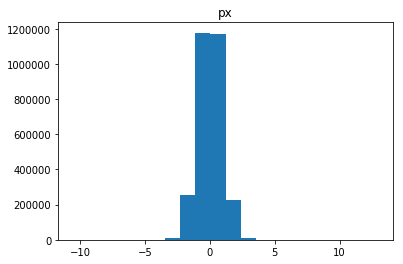

In [92]:
attributeName = 'px'
plotHist(pitchesDataSet, attributeName)

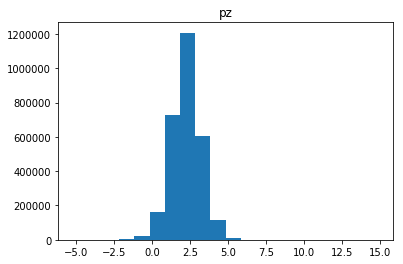

In [93]:
attributeName = 'pz'
plotHist(pitchesDataSet, attributeName)

对于数据集games.csv：

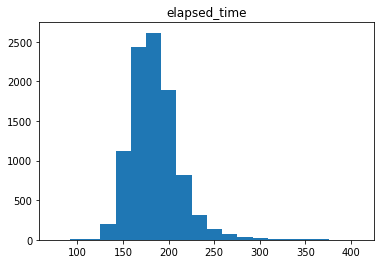

In [94]:
attributeName = 'elapsed_time'
plotHist(gamesDataSet, attributeName)

对于数据集ejections.csv：

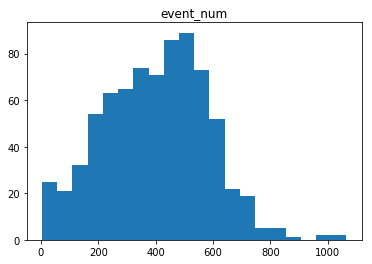

In [95]:
attributeName = 'event_num'
plotHist(ejectionsDataSet, attributeName)

数据集atbats.csv无数值属性。

**盒图**

首先我们定义函数“boxPlot”用以对特定数据集下特定列的盒图进行绘制

In [96]:
def boxPlot(data, colName):
    fig, ax = plt.subplots()
    ax.set_title(colName)
    ax.boxplot(data[colName].dropna())
    plt.show()

对于数据集pitches.csv：

绘制“px”的属性：

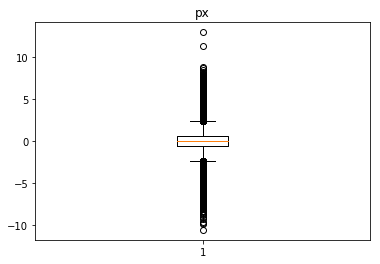

In [97]:
attributeName = 'px'
boxPlot(pitchesDataSet, attributeName)

由上图可以看出，关于“px”属性的离群点均匀分布在数据集中区域的两侧。

绘制“pz”的属性：

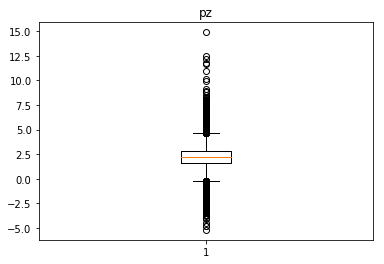

In [98]:
attributeName = 'pz'
boxPlot(pitchesDataSet, attributeName)

由上图可以看出，关于“pz”属性的离群点均匀分布在数据集中区域的两侧。

对于数据集games.csv：

绘制“elapsed_time”的属性：

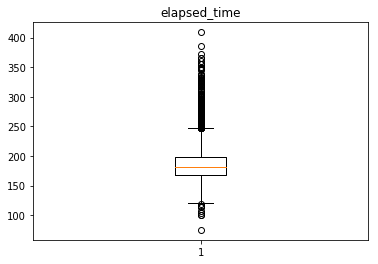

In [99]:
attributeName = 'elapsed_time'
boxPlot(gamesDataSet, attributeName)

由上图可以看出，关于“elapsed_time”属性的离群点分布在数据集中区域的两侧。

对于数据集ejections.csv：

绘制“event_num”的属性：

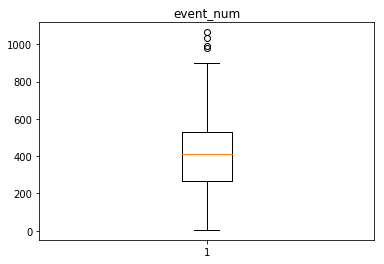

In [100]:
attributeName = 'event_num'
boxPlot(ejectionsDataSet, attributeName)

由上图可以看出，关于“px”属性的离群点均匀分布在数据集中区域的上侧。

### 1.2. 数据缺失的处理

### 1.2.1 将缺失部分剔除

首先我们需要查看一下原数据中缺失数据的数据量

我们定义函数"plotOldNewStandard"和"plotOldNewStandardNominal"分别用于数值属性和标称属性，对处理前的数据、处理后的数据进行对比：

In [101]:
def plotOldNewStandard(colOld, colNew, colName, showOld=True, divisionNum=20):
    
    colOld = colOld.dropna()
    colNew = colNew.dropna()
    if showOld:
        plt.figure(12)
        plt.subplot(121)
        plt.hist(colOld, divisionNum)
        plt.title(colName + ' Old')

        plt.subplot(122)
        plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(11)
        plt.subplot(111)
        plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')
        
        plt.tight_layout()
        plt.show()

def plotOldNewStandardNominal(colOld, colNew, colName, showOld=True, top=10, divisionNum=20):
    
    colOld = colOld.value_counts()
    colNew = colNew.value_counts()
    
    if showOld:
        plt.figure(12)
        
        plt.subplot(121)
        plt.bar(np.arange(top), colOld.iloc[:top])
        plt.title(colName + ' Old')
        
        plt.subplot(122)
        plt.bar(np.arange(top), colNew.iloc[:top])#plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')

        plt.tight_layout()
        plt.show()
    else:
        plt.figure(11)
        plt.subplot(111)
        plt.bar(np.arange(top), colNew.iloc[:top])#plt.hist(colNew, divisionNum)
        plt.title(colName + ' New')
        
        plt.tight_layout()
        plt.show()


对于数据集pitches.csv：

对于属性“px”：

In [102]:
attributeName = 'px'
col = pitchesDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 14189


剔除该属性中的缺失值：

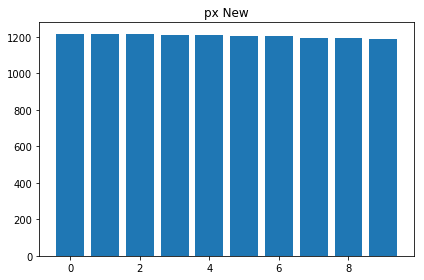

In [103]:
colOld = pitchesDataSet[attributeName]
colNew = colOld.dropna()
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colName=attributeName, showOld=False)

对于属性“pz”：

In [104]:
attributeName = 'pz'
col = pitchesDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 14189


剔除该属性中的缺失值:

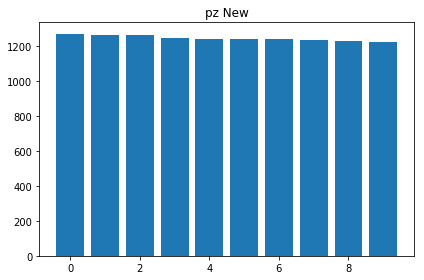

In [105]:
colOld = pitchesDataSet[attributeName]
colNew = colOld.dropna()
plotOldNewStandardNominal(colOld=colOld, colNew=colNew, colName=attributeName, showOld=False)

对于数据集games：

对于属性“elapsed_time”：

In [106]:
attributeName = 'elapsed_time'
col = gamesDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


因而该属性不需要清理，之后将不再考虑。

对于属性“away_team”：

In [107]:
attributeName = 'away_team'
col = gamesDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


因而该属性不需要清理，之后将不再考虑。

对于数据集ejections.csv：

对于属性“event_num”：

In [108]:
attributeName = 'event_num'
col = ejectionsDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


因而该属性不需要清理，之后将不再考虑。

对于属性“team”：

In [109]:
attributeName = 'team'
col = ejectionsDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


因而该属性不需要清理，之后将不再考虑。

对于数据集atbats.csv：

对于属性“event”：

In [110]:
attributeName = 'event'
col = atbatsDataSet[attributeName]

print('nan size:', col.isna().sum())

nan size: 0


因而该属性不需要清理，之后将不再考虑。

### 1.2.2 用最高频率值来填补缺失值

对于pitches.csv中的属性“px”，处理方法如下：

In [111]:
attributeName = 'px'

将该属性处理前的数据、处理后的数据进行可视化对比：

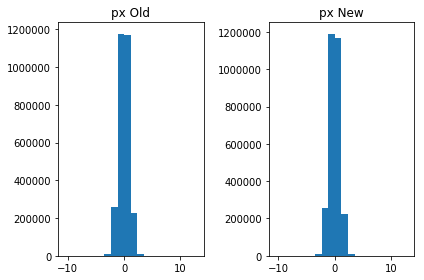

In [112]:
colOld = pitchesDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
plotOldNewStandard(colOld=colOld, colNew=colNew, colName=attributeName, showOld=True)

对于属性“pz”，处理方法如下：

In [113]:
attributeName = 'pz'

将该属性处理前的数据、处理后的数据以及winemag-data-130k-v2该属性的数据进行可视化对比：

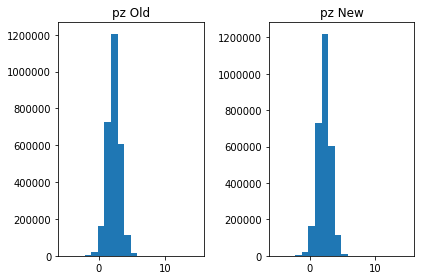

In [114]:
colOld = pitchesDataSet[attributeName]
colNew = colOld.fillna(colOld.mode()[0])
plotOldNewStandard(colOld=colOld, colNew=colNew, colName=attributeName, showOld=True)

### 1.2.3 通过属性的相关关系来填补缺失值

对于属性“away_final_score”，处理方法如下：

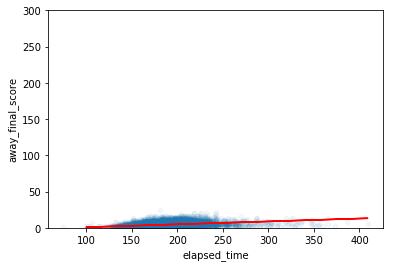

In [115]:
new_df = gamesDataSet.dropna(subset=['away_final_score'])
new_df.plot(kind="scatter", x="elapsed_time", y="away_final_score", alpha=0.05)
x = new_df['elapsed_time']
y = new_df['away_final_score']

cutLen = 1000
from sklearn.linear_model import LinearRegression

X = np.array(x).reshape(-1, 1)
X = X[:cutLen]
y = y[:cutLen]

model = LinearRegression()
model.fit(X, y)

plt.plot(X, model.predict(X), 'r-')
plt.ylim(0,300)
plt.show()


由上图可知，属性elapsed_time和away_final_score之间具有线性相关性,因此我们建立线性回归模型，通过elapsed_time来预测away_final_score的值, 并将该属性处理前的数据、处理后的数据进行可视化对比：

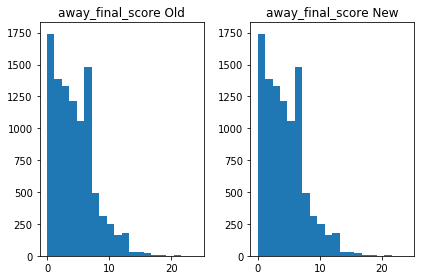

In [116]:
gamesDataSetNew = gamesDataSet.copy()
for index, row in gamesDataSetNew[gamesDataSet['away_final_score'].isna()].iterrows():
    row['away_final_score'] = model.predict(np.array(row['elapsed_time']).reshape(-1, 1))
    
attributeName = 'away_final_score'
colOld = gamesDataSet[attributeName]
colNew = gamesDataSet[attributeName]

plotOldNewStandard(colOld=colOld, colNew=colNew, colName=attributeName, showOld=True)

### 1.2.4 通过数据对象之间的相似性来填补缺失值
由于标称属性之间很难进行相似性的度量，因此本处将利用points属性的相近程度，从而进行price属性的缺失值填充：

In [117]:
simFill = gamesDataSet.copy()
point2price = {}
for row in simFill.iterrows():
    if point2price.get(row[1]['elapsed_time'], None):
        if not pd.isnull(row[1]['away_final_score']):
            point2price[row[1]['elapsed_time']][0] += row[1]['away_final_score']
            point2price[row[1]['elapsed_time']][1] += 1
    else:
        if not pd.isnull(row[1]['away_final_score']):
            point2price[row[1]['elapsed_time']] = [row[1]['away_final_score'], 1]
    
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)
    
for row in simFill.iterrows():
    if pd.isnull(row[1]['away_final_score']):
        row[1]['away_final_score'] = point2price[row[1]['elapsed_time']][0]
        


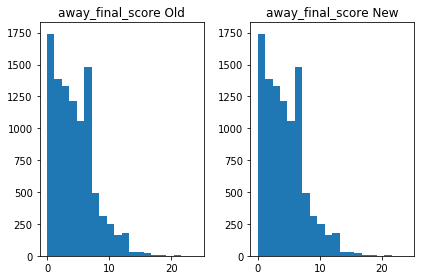

In [118]:
colOld = gamesDataSet['away_final_score']
colNew = simFill['away_final_score']
plotOldNewStandard(colOld=colOld, colNew=colNew, colName=attributeName, showOld=True)